# Regresión logística

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

# Ruta al archivo CSV
archivo_csv = "diabetes.csv"

# Leer el archivo CSV utilizando Pandas
datos = pd.read_csv(archivo_csv)


selected_columns = ['Glucose','BloodPressure', 'SkinThickness', 'Insulin','BMI']  # Add your desired column names

for col in selected_columns:
    # Calculate the mean of non-zero values in the column
    mean_val = datos.loc[datos[col] != 0, col].mean()
   

    # Replace 0 values with the mean
    datos[col] = datos[col].replace(0, mean_val)



# Análisis del dataset

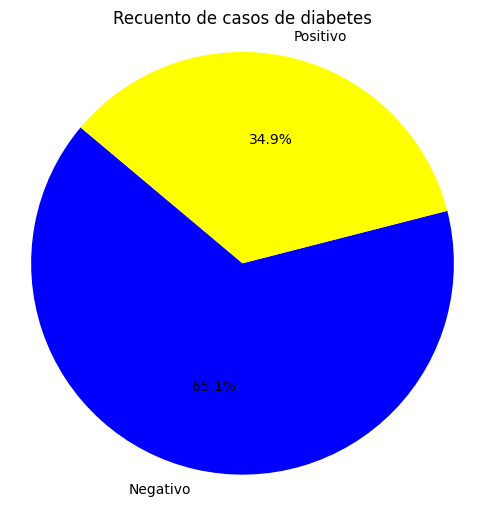

In [ ]:
# Contar el número de ceros y unos en la columna 'Columna'
counts = datos['Outcome'].value_counts()

# Gráfico de pastel
plt.figure(figsize=(6, 6))
plt.pie(counts, labels=['Negativo', 'Positivo'], colors=['blue', 'yellow'], autopct='%1.1f%%', startangle=140)
plt.title('Recuento de casos de diabetes')
plt.axis('equal')  # Ajustar el aspecto del círculo
plt.show()

# Análisis de features

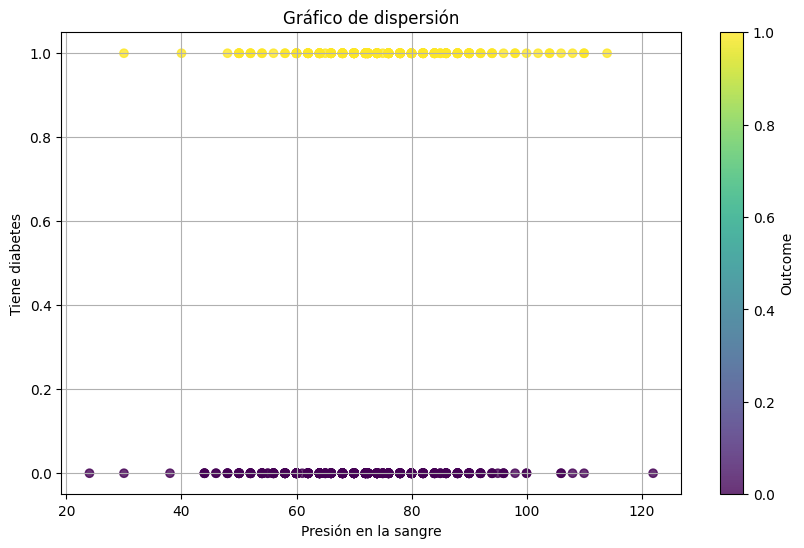

In [ ]:
import numpy as np
import matplotlib.pyplot as plt


# Gráfico de dispersión
plt.figure(figsize=(10, 6))
plt.scatter(datos['BloodPressure'], datos['Outcome'], c=datos['Outcome'], cmap='viridis', alpha=0.8)
plt.title('Gráfico de dispersión')
plt.xlabel('Presión en la sangre')
plt.ylabel('Tiene diabetes')
plt.colorbar(label='Outcome')
plt.grid(True)
plt.show()

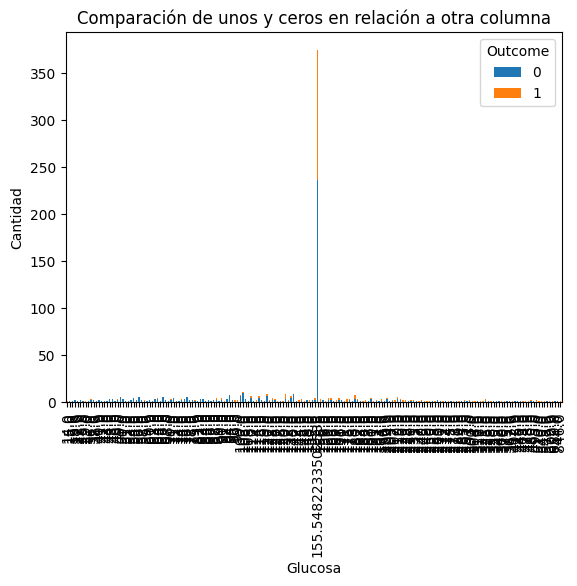

In [ ]:
# Contar los valores de 'columna2' para cada valor único en 'columna1'
counts = datos.groupby('Insulin')['Outcome'].value_counts().unstack().fillna(0)

# Graficar los valores
counts.plot(kind='bar', stacked=True)
plt.xlabel('Glucosa')
plt.ylabel('Cantidad')
plt.title('Comparación de unos y ceros en relación a otra columna')
plt.legend(title='Outcome')
plt.show()

En el gráfico anterior se puede apreciar una ligera disminución de personas con diabetes con la presión baja y un ligero incremento de personas con diabetes con la presión alta.

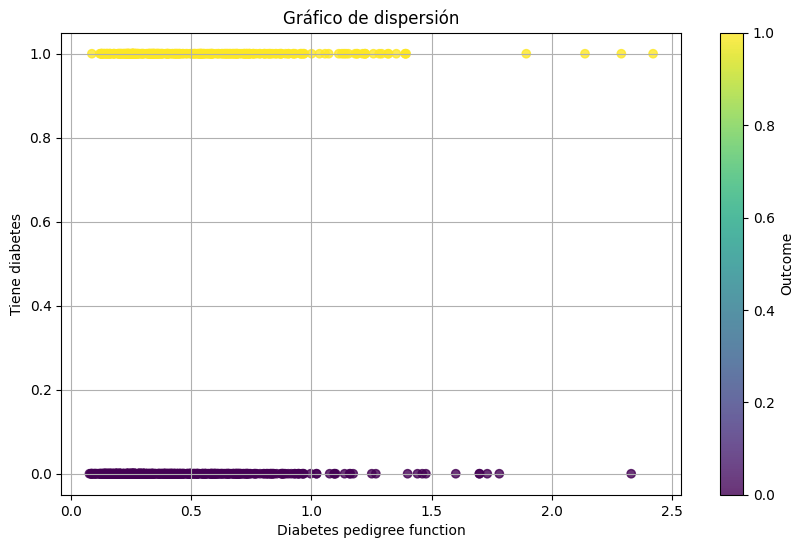

In [ ]:
# Gráfico de dispersión
plt.figure(figsize=(10, 6))
plt.scatter(datos['DiabetesPedigreeFunction'], datos['Outcome'], c=datos['Outcome'], cmap='viridis', alpha=0.8)
plt.title('Gráfico de dispersión')
plt.xlabel('Diabetes pedigree function')
plt.ylabel('Tiene diabetes')
plt.colorbar(label='Outcome')
plt.grid(True)
plt.show()

Ambiguo, realmente no se puede interpretar algun comportamientos que nos ayude a predecir si una persona tiene o no diabetes.

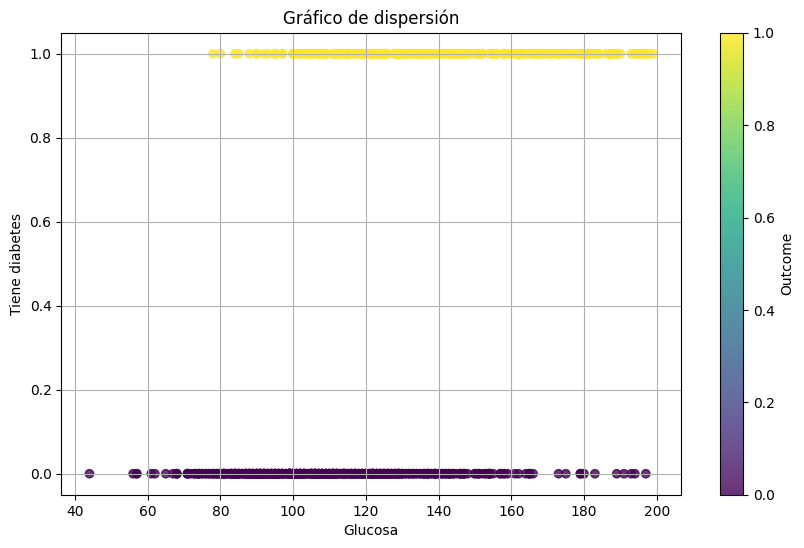

In [ ]:
# Gráfico de dispersión
plt.figure(figsize=(10, 6))
plt.scatter(datos['Glucose'], datos['Outcome'], c=datos['Outcome'], cmap='viridis', alpha=0.8)
plt.title('Gráfico de dispersión')
plt.xlabel('Glucosa')
plt.ylabel('Tiene diabetes')
plt.colorbar(label='Outcome')
plt.grid(True)
plt.show()

Similar al gráfico de la presión en la sangre pero acá es más marcado la diminución en niveles bajos y un ligero incremento en niveles altos, esta parece la mejor feature.

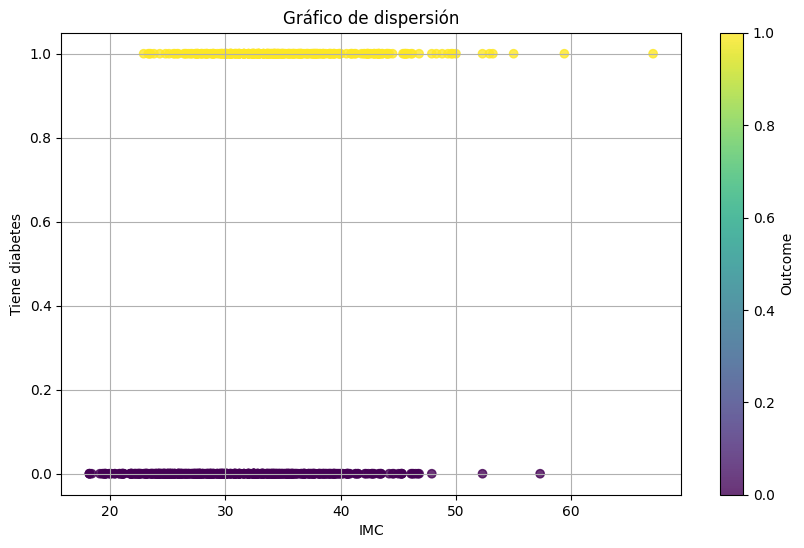

In [ ]:
# Gráfico de dispersión
plt.figure(figsize=(10, 6))
plt.scatter(datos['BMI'], datos['Outcome'], c=datos['Outcome'], cmap='viridis', alpha=0.8)
plt.title('Gráfico de dispersión')
plt.xlabel('IMC')
plt.ylabel('Tiene diabetes')
plt.colorbar(label='Outcome')
plt.grid(True)
plt.show()

Igual que el gráfico de la glucosa, este feature es un buen canditado también.

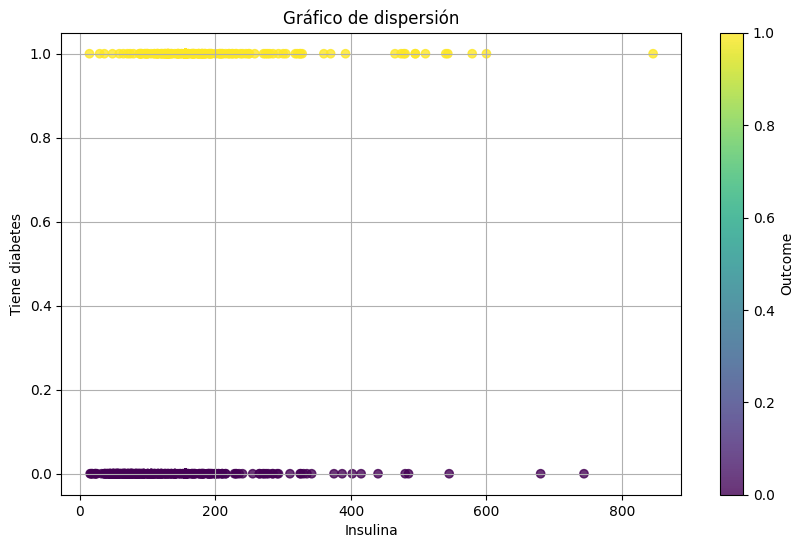

In [ ]:
# Gráfico de dispersión
plt.figure(figsize=(10, 6))
plt.scatter(datos['Insulin'], datos['Outcome'], c=datos['Outcome'], cmap='viridis', alpha=0.8)
plt.title('Gráfico de dispersión')
plt.xlabel('Insulina')
plt.ylabel('Tiene diabetes')
plt.colorbar(label='Outcome')
plt.grid(True)
plt.show()

Ambiguo

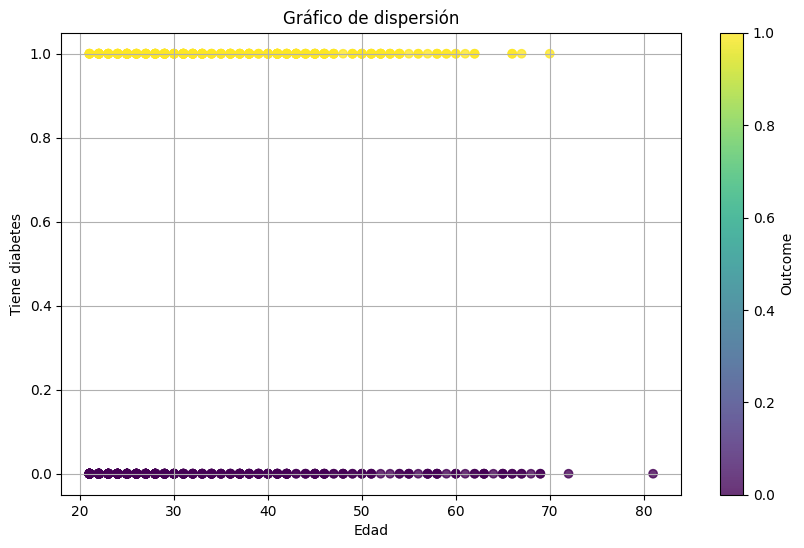

In [ ]:
# Gráfico de dispersión
plt.figure(figsize=(10, 6))
plt.scatter(datos['Age'], datos['Outcome'], c=datos['Outcome'], cmap='viridis', alpha=0.8)
plt.title('Gráfico de dispersión')
plt.xlabel('Edad')
plt.ylabel('Tiene diabetes')
plt.colorbar(label='Outcome')
plt.grid(True)
plt.show()

Ambiguo

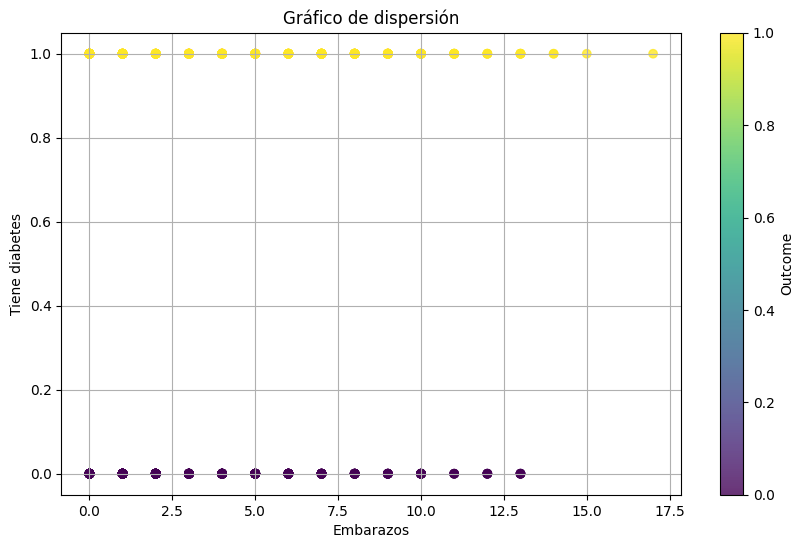

In [ ]:
# Gráfico de dispersión
plt.figure(figsize=(10, 6))
plt.scatter(datos['Pregnancies'], datos['Outcome'], c=datos['Outcome'], cmap='viridis', alpha=0.8)
plt.title('Gráfico de dispersión')
plt.xlabel('Embarazos')
plt.ylabel('Tiene diabetes')
plt.colorbar(label='Outcome')
plt.grid(True)
plt.show()

Ambiguo

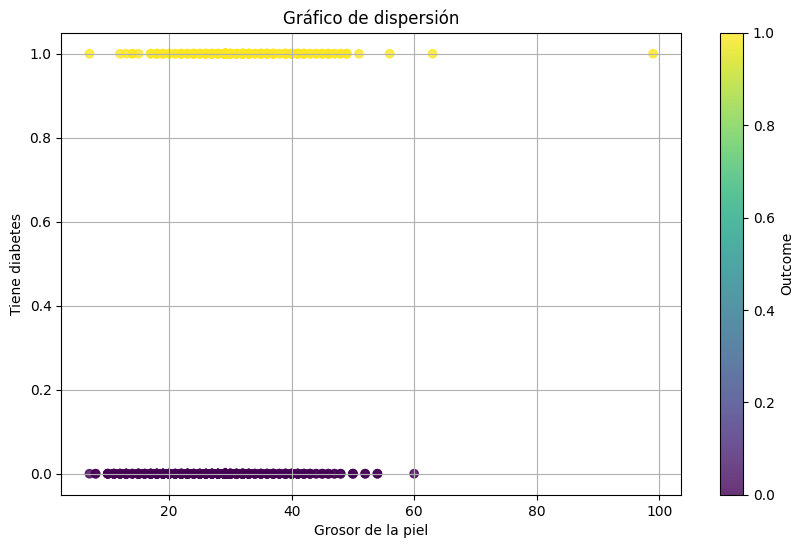

In [ ]:
# Gráfico de dispersión
plt.figure(figsize=(10, 6))
plt.scatter(datos['SkinThickness'], datos['Outcome'], c=datos['Outcome'], cmap='viridis', alpha=0.8)
plt.title('Gráfico de dispersión')
plt.xlabel('Grosor de la piel')
plt.ylabel('Tiene diabetes')
plt.colorbar(label='Outcome')
plt.grid(True)
plt.show()

Pareciera haber un comportamiento similar al gráfico de la presión en la sangre.

# Pruebas con datos sin normalizar

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

X = datos[["Glucose","BMI","BloodPressure","SkinThickness","Pregnancies","Insulin","DiabetesPedigreeFunction"]]
y = datos['Outcome']

# Dividir los datos en conjuntos de entrenamiento y prueba (80-20)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=datos["Outcome"])


solvers_l1=["liblinear","saga"]
solvers_l2=["liblinear","newton-cg","lbfgs","sag"]

for elemento in solvers_l1:

    #Incializar el modelo
    model = LogisticRegression(penalty="l1", solver=elemento)

    # Entrenar el modelo de regresión logística
    model.fit(X_train, y_train)
    
    # Predecir en el conjunto de prueba
    y_pred = model.predict(X_test)

    # Evaluar el rendimiento del modelo
    print("Resultados del modelo con penalty l1 y solver: ", elemento)
    accuracy = accuracy_score(y_test, y_pred)
    print("Accuracy:", accuracy)
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred))
    print("\nConfusion Matrix:")
    print(confusion_matrix(y_test, y_pred), "\n")

for elemento in solvers_l2:

    #Incializar el modelo
    model = LogisticRegression(penalty="l2",solver=elemento)

    # Entrenar el modelo de regresión logística
    model.fit(X_train, y_train)
    
    # Predecir en el conjunto de prueba
    y_pred = model.predict(X_test)

    # Evaluar el rendimiento del modelo
    print("Resultados del modelo con penalty l2 y solver: ", elemento)
    accuracy = accuracy_score(y_test, y_pred)
    print("Accuracy:", accuracy)
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred))
    print("\nConfusion Matrix:")
    print(confusion_matrix(y_test, y_pred), "\n")

Resultados del modelo con penalty l1 y solver:  liblinear
Accuracy: 0.6753246753246753

Classification Report:
              precision    recall  f1-score   support

           0       0.73      0.79      0.76       100
           1       0.54      0.46      0.50        54

    accuracy                           0.68       154
   macro avg       0.64      0.63      0.63       154
weighted avg       0.67      0.68      0.67       154


Confusion Matrix:
[[79 21]
 [29 25]] 

Resultados del modelo con penalty l1 y solver:  saga
Accuracy: 0.7142857142857143

Classification Report:
              precision    recall  f1-score   support

           0       0.73      0.90      0.80       100
           1       0.67      0.37      0.48        54

    accuracy                           0.71       154
   macro avg       0.70      0.64      0.64       154
weighted avg       0.71      0.71      0.69       154


Confusion Matrix:
[[90 10]
 [34 20]] 

Resultados del modelo con penalty l2 y solver:  l

C:\Users\Tony\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\Tony\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Tony\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Pyth

# Pruebas con datos normalizados

In [ ]:
from sklearn.preprocessing import MinMaxScaler

# Inicializar el objeto MinMaxScaler
scaler = MinMaxScaler()

# Seleccionar las características a normalizar (por ejemplo, todas las columnas)
features_to_normalize = datos.columns.difference(["Outcome"])

datos_normalizados=pd.DataFrame(scaler.fit_transform(datos[features_to_normalize]), columns=features_to_normalize)

datos_normalizados["Outcome"]=datos["Outcome"]


for elemento in solvers_l1:

    #Incializar el modelo
    model = LogisticRegression(penalty="l1",solver=elemento)

    # Entrenar el modelo de regresión logística
    model.fit(X_train, y_train)
    
    # Predecir en el conjunto de prueba
    y_pred = model.predict(X_test)

    # Evaluar el rendimiento del modelo
    print("Resultados del modelo con penalty l1 y solver: ", elemento)
    accuracy = accuracy_score(y_test, y_pred)
    print("Accuracy:", accuracy)
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred))
    print("\nConfusion Matrix:")
    print(confusion_matrix(y_test, y_pred), "\n")

for elemento in solvers_l2:

    #Incializar el modelo
    model = LogisticRegression(penalty="l2",solver=elemento)

    # Entrenar el modelo de regresión logística
    model.fit(X_train, y_train)
    
    # Predecir en el conjunto de prueba
    y_pred = model.predict(X_test)

    # Evaluar el rendimiento del modelo
    print("Resultados del modelo con penalty l2 y solver: ", elemento)
    accuracy = accuracy_score(y_test, y_pred)
    print("Accuracy:", accuracy)
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred))
    print("\nConfusion Matrix:")
    print(confusion_matrix(y_test, y_pred), "\n")   

Resultados del modelo con penalty l1 y solver:  liblinear
Accuracy: 0.6753246753246753

Classification Report:
              precision    recall  f1-score   support

           0       0.73      0.79      0.76       100
           1       0.54      0.46      0.50        54

    accuracy                           0.68       154
   macro avg       0.64      0.63      0.63       154
weighted avg       0.67      0.68      0.67       154


Confusion Matrix:
[[79 21]
 [29 25]] 

Resultados del modelo con penalty l1 y solver:  saga
Accuracy: 0.7142857142857143

Classification Report:
              precision    recall  f1-score   support

           0       0.73      0.90      0.80       100
           1       0.67      0.37      0.48        54

    accuracy                           0.71       154
   macro avg       0.70      0.64      0.64       154
weighted avg       0.71      0.71      0.69       154


Confusion Matrix:
[[90 10]
 [34 20]] 

Resultados del modelo con penalty l2 y solver:  l

C:\Users\Tony\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\Tony\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Tony\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Pyth

# KNN

In [ ]:
#diabetes
diabetes_dataset_csv.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [ ]:
y = diabetes_dataset_csv['Outcome']
x = diabetes_dataset_csv [['Pregnancies','Glucose','BloodPressure','SkinThickness','Insulin','BMI','Age']]

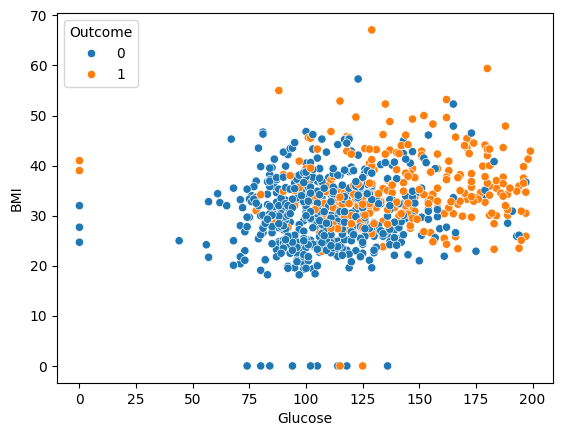

In [ ]:
fig = sns.scatterplot(data=diabetes_dataset_csv,x='Glucose',y='BMI',hue='Outcome')
#es facil ver segun aumenta la glucosa y el indice de masa corporal es mas posible que tenga Diabetes una persona

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42,stratify=y)

In [ ]:
scores = []
ks = range(1,25)
for k in ks:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores.append(np.mean(cross_val_score(knn,x_train,y_train,cv=5)))

In [ ]:
best_k = ks[np.argmax(scores)]
knn = KNeighborsClassifier(n_neighbors=20)
print(best_k)
knn.fit(x_train, y_train)

12


KNeighborsClassifier(n_neighbors=20)

In [ ]:
predictions = knn.predict(x_test)
list(zip(predictions,y_test))

[(1, 0),
 (0, 0),
 (0, 0),
 (0, 1),
 (0, 0),
 (0, 0),
 (0, 1),
 (1, 1),
 (0, 0),
 (1, 0),
 (0, 0),
 (0, 1),
 (0, 0),
 (1, 0),
 (0, 1),
 (0, 1),
 (1, 0),
 (0, 0),
 (1, 0),
 (0, 0),
 (0, 0),
 (1, 1),
 (0, 1),
 (1, 1),
 (0, 0),
 (0, 0),
 (1, 1),
 (0, 0),
 (0, 1),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (1, 0),
 (1, 0),
 (0, 1),
 (0, 0),
 (0, 0),
 (1, 1),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 1),
 (0, 0),
 (0, 1),
 (0, 1),
 (0, 0),
 (1, 1),
 (0, 1),
 (0, 0),
 (1, 1),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (1, 1),
 (0, 0),
 (1, 1),
 (0, 0),
 (1, 1),
 (0, 0),
 (0, 0),
 (1, 1),
 (0, 0),
 (0, 0),
 (1, 1),
 (0, 0),
 (0, 0),
 (0, 1),
 (0, 1),
 (0, 0),
 (0, 0),
 (1, 1),
 (0, 0),
 (0, 1),
 (0, 0),
 (0, 1),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (1, 0),
 (0, 0),
 (0, 0),
 (1, 1),
 (1, 1),
 (0, 0),
 (0, 0),
 (1, 1),
 (1, 1),
 (0, 0),
 (0, 1),
 (0, 1),
 (0, 1),
 (1, 0),
 (0, 0),
 (1, 1),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (1, 1),
 (0, 0),
 (1, 1),
 (0, 0),
 (1, 0),
 (0, 0),
 (1, 0),
 

In [ ]:
test_accuaracy = knn.score(x_test, y_test)
print("Test Accuary: {:.2f}".format(test_accuaracy))
print(classification_report(y_test,predictions))

Test Accuary: 0.71
              precision    recall  f1-score   support

           0       0.75      0.85      0.79       100
           1       0.62      0.46      0.53        54

    accuracy                           0.71       154
   macro avg       0.69      0.66      0.66       154
weighted avg       0.70      0.71      0.70       154



In [ ]:
# Diccionario para almacenar los resultados
results = {'K': [], 'Accuracy': [], 'Precision 0': [], 'Precision 1': [], 'Recall 0': [], 'Recall 1': [], 'F1-score 0': [], 'F1-score 1': []}
ks = range(1,20)
print (ks)
for k in ks:
    
    knn = KNeighborsClassifier(k)
    knn.fit(x_train, y_train)
    
    # Realizar predicciones en los datos de prueba
    y_pred = knn.predict(x_test)
    
    # Calcular métricas
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average=None )
    recall = recall_score(y_test, predictions, average=None)
    f1 = f1_score(y_test, predictions, average=None) 
    # Almacenar los resultados en el diccionario
    results['K'].append(k)
    results['Accuracy'].append(accuracy)
    results['Precision 0'].append(precision[0])
    results['Precision 1'].append(precision[1])
    results['Recall 0'].append(recall[0])
    results['Recall 1'].append(recall[1])
    results['F1-score 0'].append(f1[0])
    results['F1-score 1'].append(f1[1])
    results_df = pd.DataFrame(results)
    
print("Tabla de resultados:")
print(results_df)

range(1, 20)
Tabla de resultados:
     K  Accuracy  Precision 0  Precision 1  Recall 0  Recall 1  F1-score 0  \
0    1  0.662338     0.744898     0.517857      0.85  0.462963    0.794393   
1    2  0.714286     0.725806     0.666667      0.85  0.462963    0.794393   
2    3  0.694805     0.747664     0.574468      0.85  0.462963    0.794393   
3    4  0.727273     0.737705     0.687500      0.85  0.462963    0.794393   
4    5  0.662338     0.730769     0.520000      0.85  0.462963    0.794393   
5    6  0.714286     0.737288     0.638889      0.85  0.462963    0.794393   
6    7  0.675325     0.735849     0.541667      0.85  0.462963    0.794393   
7    8  0.707792     0.735043     0.621622      0.85  0.462963    0.794393   
8    9  0.688312     0.745283     0.562500      0.85  0.462963    0.794393   
9   10  0.681818     0.729730     0.558140      0.85  0.462963    0.794393   
10  11  0.675325     0.740385     0.540000      0.85  0.462963    0.794393   
11  12  0.701299     0.736842 

# Redes neuronales

In [ ]:
# Libreria importantes para la Tarea
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import MinMaxScaler
from sklearn.neural_network import MLPClassifier
# Import necessary modules
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix


import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


# Se corre una vez para mezclar el dataset y se usa el mezclado
dataSet = pd.read_csv("diabetes.csv")

dataSet.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


c:\Users\tian_\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Figure size 1000x800 with 0 Axes>

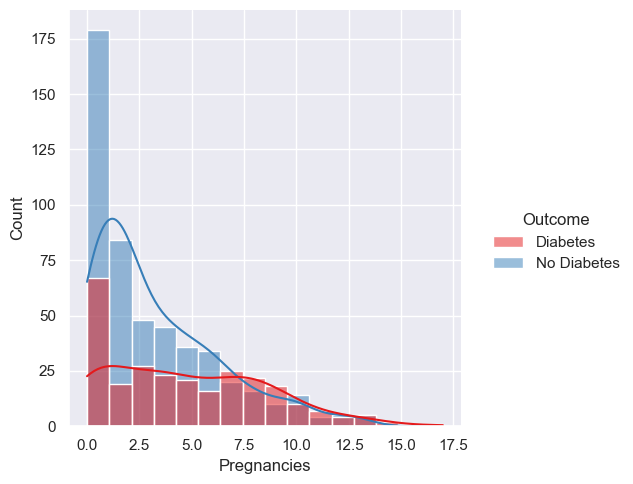

In [ ]:
#Se cambia en el dataset los 1: 'Diabetes', 0: 'No Diabetes'

dataSet['Outcome'] = dataSet['Outcome'].replace({1: 'Diabetes', 0: 'No Diabetes'})
sns.set_theme()
plt.figure(figsize=(10, 8))
sns.displot(data=dataSet, x="Pregnancies",kde=True, hue="Outcome", palette='Set1')
dataSet.to_csv('DataSetTestingLimpio.csv', index=False)
plt.show()

c:\Users\tian_\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Figure size 1000x800 with 0 Axes>

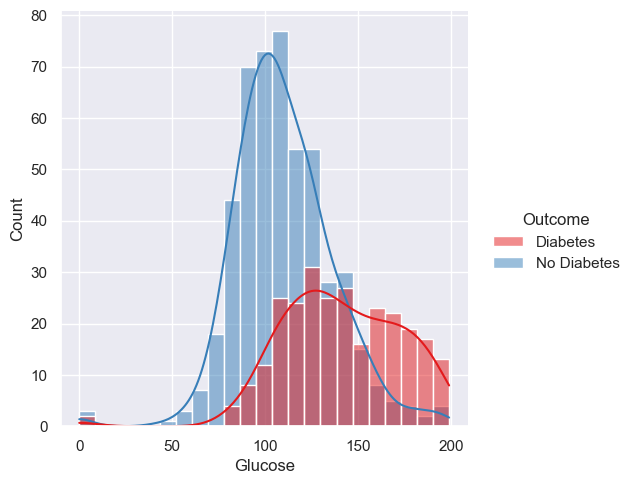

In [ ]:

sns.set_theme()
plt.figure(figsize=(10, 8))
sns.displot(data=dataSet, x="Glucose",kde=True, hue="Outcome", palette='Set1')

plt.show()

c:\Users\tian_\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Figure size 1000x800 with 0 Axes>

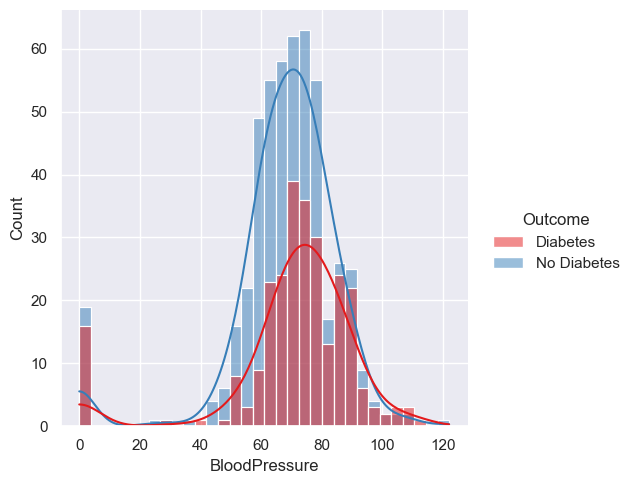

In [ ]:

sns.set_theme()
plt.figure(figsize=(10, 8))
sns.displot(data=dataSet, x="BloodPressure", hue="Outcome", kde=True,palette='Set1')

plt.show()

c:\Users\tian_\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Figure size 1000x800 with 0 Axes>

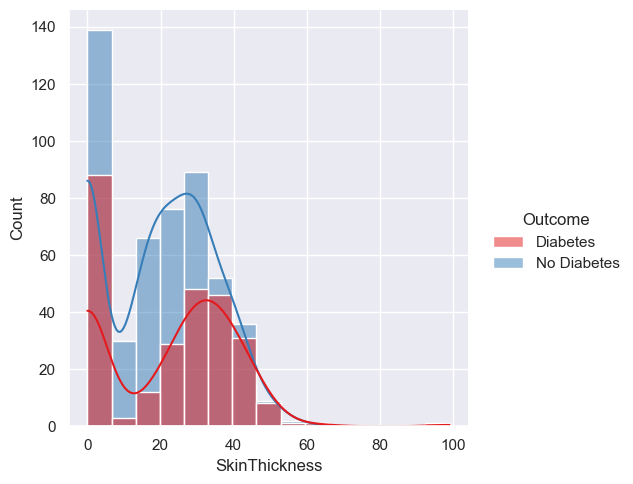

In [ ]:
sns.set_theme()
plt.figure(figsize=(10, 8))
sns.displot(data=dataSet, x="SkinThickness", hue="Outcome",kde=True, palette='Set1')

plt.show()

c:\Users\tian_\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Figure size 1000x800 with 0 Axes>

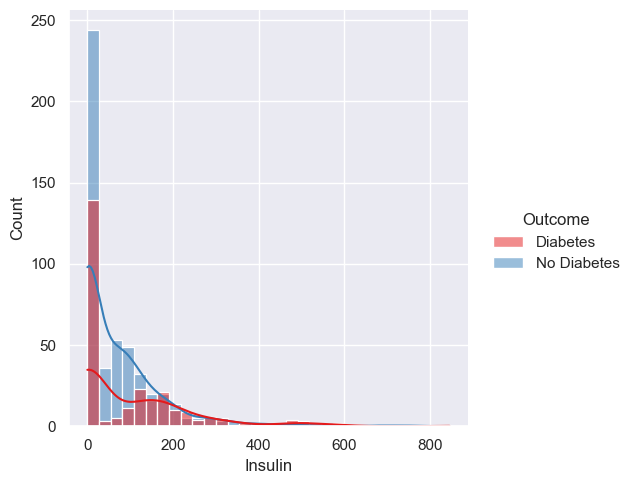

In [ ]:
sns.set_theme()
plt.figure(figsize=(10, 8))
sns.displot(data=dataSet, x="Insulin", hue="Outcome",kde=True, palette='Set1')

plt.show()

c:\Users\tian_\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Figure size 1000x800 with 0 Axes>

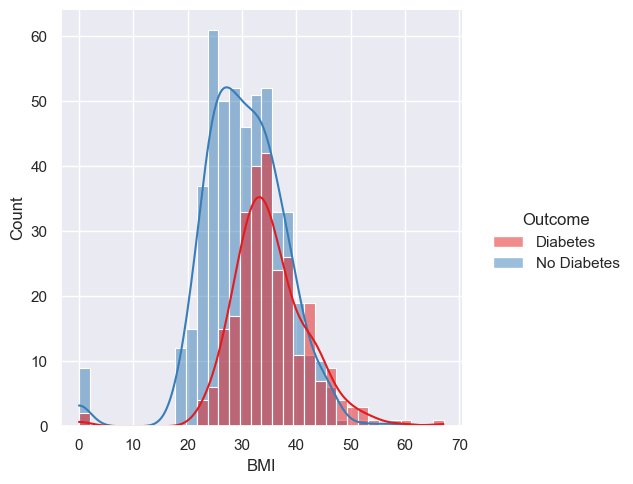

In [ ]:
sns.set_theme()
plt.figure(figsize=(10, 8))
sns.displot(data=dataSet, x="BMI", hue="Outcome",kde=True, palette='Set1')

plt.show()

c:\Users\tian_\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Figure size 1000x800 with 0 Axes>

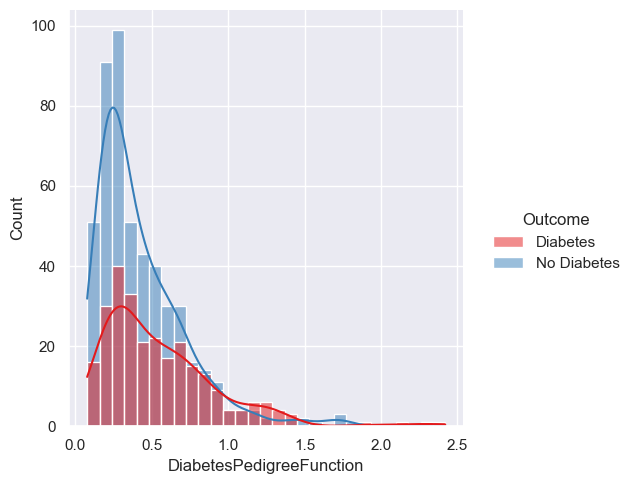

In [ ]:
sns.set_theme()
plt.figure(figsize=(10, 8))
sns.displot(data=dataSet, x="DiabetesPedigreeFunction", kde=True,hue="Outcome", palette='Set1')

plt.show()

c:\Users\tian_\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Figure size 1000x800 with 0 Axes>

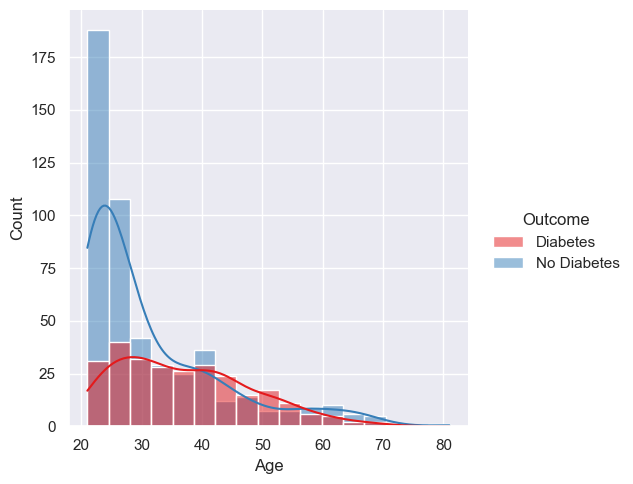

In [ ]:
sns.set_theme()
plt.figure(figsize=(10, 8))
sns.displot(data=dataSet, x="Age", hue="Outcome",kde=True, palette='Set1')

plt.show()

In [ ]:
#se normaliza y se quitan los cero para la visualizacion de los graficos
dataSet = pd.read_csv("diabetes.csv")
dataSet = dataSet.sample(frac=1,random_state=42).reset_index(drop=True)
selected_columns = ['Glucose','BloodPressure', 'SkinThickness', 'Insulin','BMI']  # columnas para quitar el 0

for col in selected_columns:
   
    mean_val = dataSet.loc[dataSet[col] != 0, col].mean()

    dataSet[col] = dataSet[col].replace(0, mean_val)


target = ['Outcome'] 
features = list(set(list(dataSet.columns))-set(target))
dataSet.to_csv("datasetSinCeros.csv", index=False)
dataSet = pd.read_csv("datasetSinCeros.csv")



scaler = MinMaxScaler()
features_to_normalize = dataSet.columns.difference(["Outcome"])
datos_normalizados=pd.DataFrame(scaler.fit_transform(dataSet[features_to_normalize]), columns=features_to_normalize)
datos_normalizados["Outcome"]=dataSet["Outcome"]



c:\Users\tian_\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Figure size 1000x800 with 0 Axes>

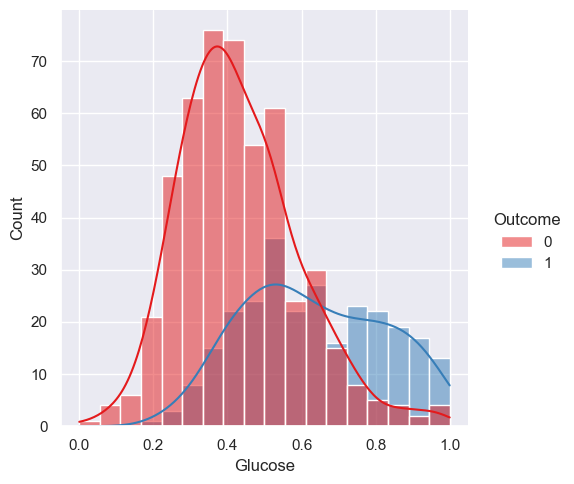

In [ ]:
sns.set_theme()
plt.figure(figsize=(10, 8))
sns.displot(data=datos_normalizados, x="Glucose",kde=True, hue="Outcome", palette='Set1')

plt.show()

c:\Users\tian_\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Figure size 1000x800 with 0 Axes>

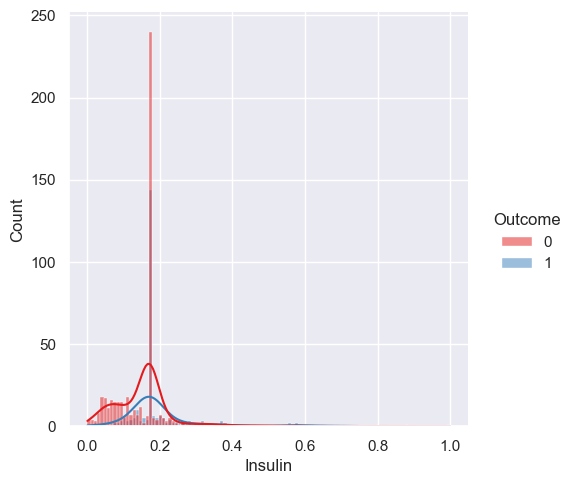

In [ ]:
sns.set_theme()
plt.figure(figsize=(10, 8))
sns.displot(data=datos_normalizados, x="Insulin",kde=True, hue="Outcome", palette='Set1')

plt.show()

c:\Users\tian_\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Figure size 1000x800 with 0 Axes>

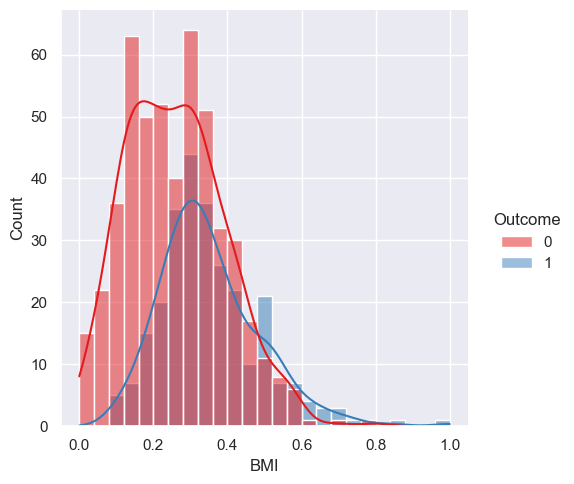

In [ ]:
sns.set_theme()
plt.figure(figsize=(10, 8))
sns.displot(data=datos_normalizados, x="BMI",kde=True, hue="Outcome", palette='Set1')

plt.show()

c:\Users\tian_\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Figure size 1000x800 with 0 Axes>

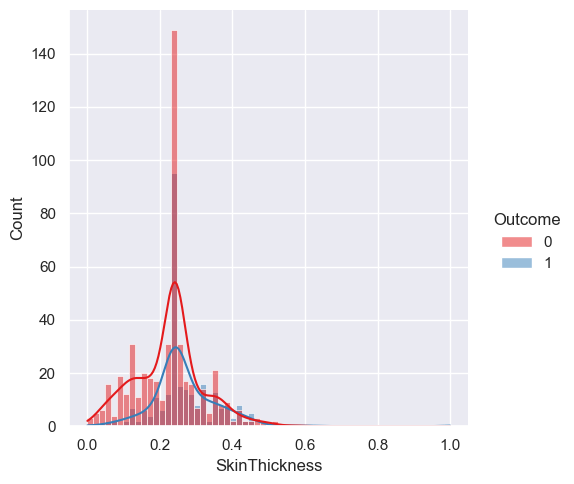

In [ ]:
sns.set_theme()
plt.figure(figsize=(10, 8))
sns.displot(data=datos_normalizados, x="SkinThickness",kde=True, hue="Outcome", palette='Set1')

plt.show()

c:\Users\tian_\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Figure size 1000x800 with 0 Axes>

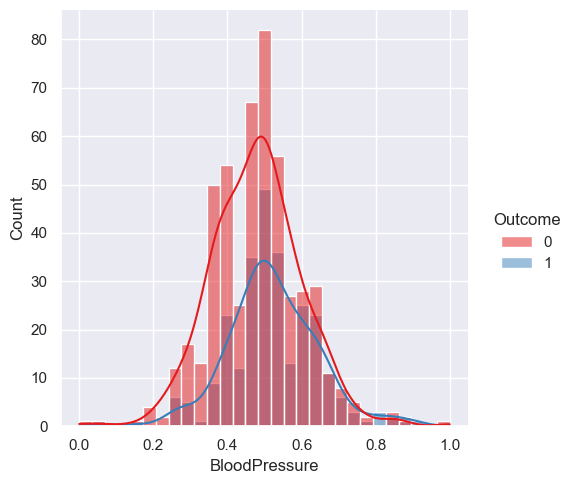

In [ ]:
sns.set_theme()
plt.figure(figsize=(10, 8))
sns.displot(data=datos_normalizados, x="BloodPressure",kde=True, hue="Outcome", palette='Set1')

plt.show()

In [ ]:
# Libreria importantes para la proyecto
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

# Se corre una vez para mezclar el dataset y se usa el mezclado con la semilla 42
dataSet = pd.read_csv("diabetes.csv")
dataSet = dataSet.sample(frac=1,random_state=42).reset_index(drop=True)

# Se selecionan las columnas con 0 para cambiarlo por la media con los datos que no tienen 0
selected_columns = ['Glucose','BloodPressure', 'SkinThickness', 'Insulin','BMI']  

for col in selected_columns:
    mean_val = dataSet.loc[dataSet[col] != 0, col].mean()
    dataSet[col] = dataSet[col].replace(0, mean_val)

#Se seleciona la columna target y las columnas de features
target = ['Outcome'] 
features = list(set(list(dataSet.columns))-set(target))


#Se guarda el csv para verificar el shuffle y que se hayan cambiado correctametne los valores
dataSet.to_csv("datasetSinCeros.csv", index=False)
dataSet = pd.read_csv("datasetSinCeros.csv")


#Se normalizan los datos en un rango de 0 a 1 por la diferencia de tamaño en las columnas
scaler = MinMaxScaler()
features_to_normalize = dataSet.columns.difference(["Outcome"])
datos_normalizados=pd.DataFrame(scaler.fit_transform(dataSet[features_to_normalize]), columns=features_to_normalize)

datos_normalizados["Outcome"]=dataSet["Outcome"]
datos_normalizados.to_csv("datasetSinCerosN.csv", index=False)

dataSet.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,121.686763,72.405184,29.153420,155.548223,32.457464,0.471876,33.240885,0.348958
std,3.369578,30.435949,12.096346,8.790942,85.021108,6.875151,0.331329,11.760232,0.476951
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.750000,64.000000,25.000000,121.500000,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.202592,29.153420,155.548223,32.400000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,155.548223,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [ ]:
datos_normalizados.describe()

,Age,BMI,BloodPressure,DiabetesPedigreeFunction,Glucose,Insulin,Pregnancies,SkinThickness,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,0.204015,0.291564,0.493930,0.168179,0.501205,0.170130,0.226180,0.240798,0.348958
std,0.196004,0.140596,0.123432,0.141473,0.196361,0.102189,0.198210,0.095554,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.050000,0.190184,0.408163,0.070773,0.359677,0.129207,0.058824,0.195652,0.000000
50%,0.133333,0.290389,0.491863,0.125747,0.470968,0.170130,0.176471,0.240798,0.000000
75%,0.333333,0.376278,0.571429,0.234095,0.620968,0.170130,0.352941,0.271739,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
#Se hace el split de los datos 80 entrenamiento ,  20 pruebas, asegurandose el balaceo correcto de datos
#con el parametro adicional stratify
dataTraining, dataTesting = train_test_split(datos_normalizados, test_size=0.2, random_state=42, stratify=dataSet['Outcome'])

#Se asigana el target y los features
x_train = dataTraining[features].values
y_train = dataTraining[target].values


x_test = dataTesting[features].values
y_test = dataTesting[target].values


## el default del alpha es 0.0001
# Se llama a la funcion de MLPCLAssifier que es la red neuronal, y aqui es donde se agustan los hiperparmetros.
mlp = MLPClassifier(hidden_layer_sizes=(64,32,16,8), activation='relu', solver='adam', max_iter=500)


# Se entreba con el vector de features y el vector target que son 80% de los datos
mlp.fit(x_train,y_train)

# Se hace la predicion con el 20% de los datos
predict_train = mlp.predict(x_train)
predict_test = mlp.predict(x_test)
# Se llama a la funcion classification nos da el reporto de metricas
print(classification_report(y_test,predict_test))


c:\Users\tian_\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1098: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


              precision    recall  f1-score   support

           0       0.83      0.86      0.85       100
           1       0.73      0.69      0.70        54

    accuracy                           0.80       154
   macro avg       0.78      0.77      0.78       154
weighted avg       0.80      0.80      0.80       154

